# Optical Recognition of Handwritten Digits, Using Scikit, Matplotlib, & Support Vector Machine (SVM)
**Thanks to :** [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)
<br>This example shows **scikit-learn** can be used to recognize images of **hand-written digits, from 0-9.**

# 1. Dataset Description

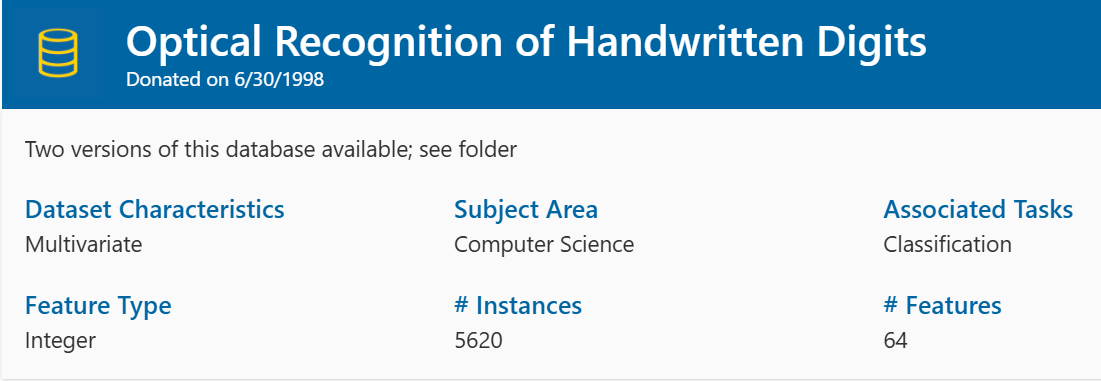

## 1.2 Dataset Information
#### [Optical recognition of handwritten digits dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset)
This is a copy of the **test set** of the [UCI ML hand-written digits datasets.](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)
<br>The data set contains images of hand-written digits: **10 classes** *where each class refers to a **digit**.*

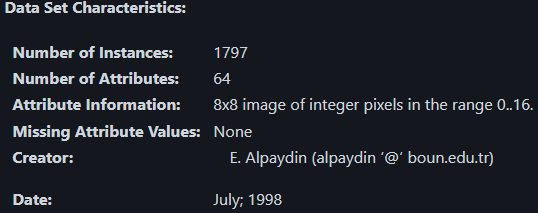

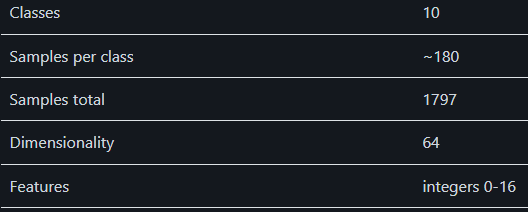

## 1.3 Variables Information
All input attributes **(1 to 64)** are **integers.**
The last attribute **(65)**, consider as output is the **Class Code of 0 to 9**

### Variable Table
**Input Feature Name :** Attribute1 to Attribute64
<br>**Data Type :** Integer
<br>**Target Name :** Class *(Categorical)*
<br>**Missing Values :** No

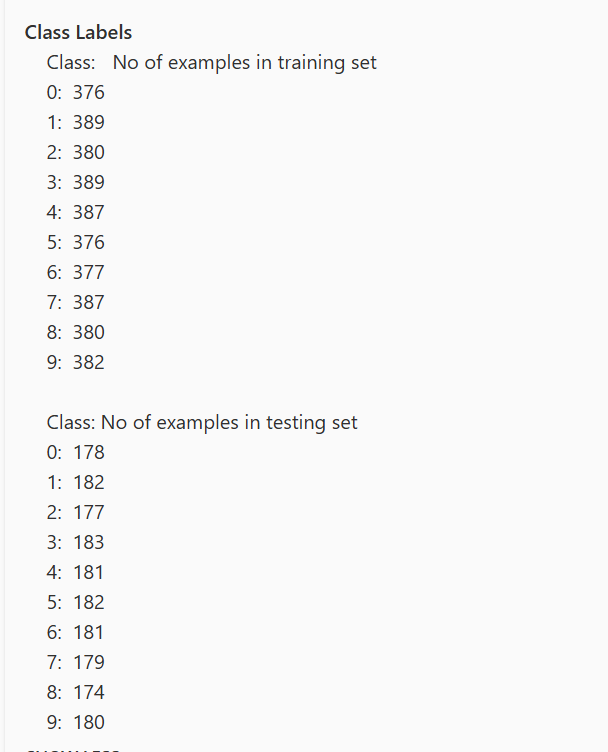

# 1.4 Purposes / Objective
*The motivation of this classification program is to identify (Predict) the correct **image of digit**.*

# 2. Import libraries

In [1]:
# Import sci-kit's learn datasets, classifier (svm) and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

In [2]:
# [Importance of Distance Metrics in Machine Learning Modelling]
#   (https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d)
# [PREDICTION-OF-HCP-HEAs-USING-ML]
#   (https://github.com/Akhil46971/PREDICTION-OF-HCP-HEAs-USING-ML)
%matplotlib inline

# 3. Load digits dataset
The digits dataset consists of **8x8 pixel images of digits.** The images attribute of the dataset stores<br> **8x8 arrays of grayscale values** for each image.
<br>
<br>We will use these arrays to **visualize the first 4 images.** The **target** attribute of <u>this dataset stores the <br>digit representation of each image</u>  and this is included in the **title of the 4 plots** below.<br>
<br>
**Note :**<br>
*If working from image files (e.g., ‘png’ files), then can load them using.*
[matplotlib.pyplot.imread](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html#matplotlib.pyplot.imread)

##### [sklearn.datasets.load_digits(*, n_class=10, return_X_y=False, as_frame=False)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
Load and return the digits dataset (classification).
<br>Each datapoint is a **8x8 image** of a digit.

#### [matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
This is a utility wrapper in order to make it convenient to create common layouts of subplots, <br>including the enclosing figure object, in a single call.

##### matplotlib.pyplot.subplots returns as follows:-

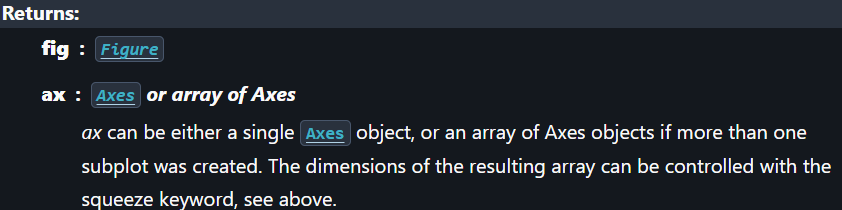

digits.data.shape : (1797, 64)
digits.target.shape: (1797,)


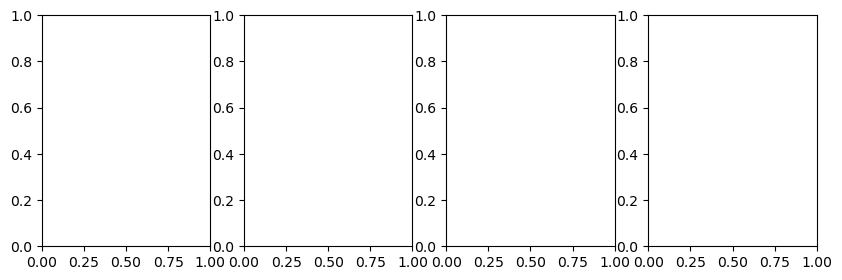

In [3]:
# load the digit dataset
digits = datasets.load_digits()

axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

print(f"digits.data.shape : {digits.data.shape}")
print(f"digits.target.shape: {digits.target.shape}")

#### [matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
Display data as an image, i.e., on a 2D regular raster *(rectangular formation)*.
#### [Interpolations for imshow](https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html)
Interpolation *(introduced a message)*
<br>**interpolation='none'** works well when a big image is scaled down, while <br>**interpolation='nearest'** works well when a small image is scaled up.

# 4. Digit dataset exploratory data analysis (EDA)

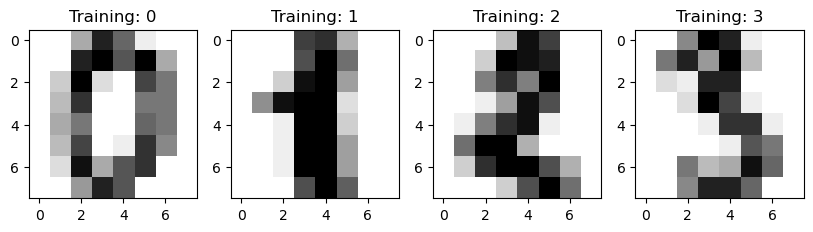

In [4]:
# As mentioned above, here we are ignoring the return object "Figure" and just
# storing the "Axes" object
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

# Python zip() method takes iterable containers and returns a single iterator
# object, having mapped values from all the containers.
#                           axes,  independent, dependent variable
for ax, image, label in zip(axes, digits.images, digits.target):

  # ax.set_axis_off()
  # cmap = colormap instance or registered name, used to map scalar data to colors.
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title('Training: %i' % label)

#### [matplotlib.axes.Axes.set_axis_off](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_axis_off.html)
Hide all visual components of the x- and y-axis.

* This sets a flag to suppress drawing of all axis decorations, i.e. **axis labels, axis spines, and the axis tick component (tick markers, tick labels, and grid lines).**
* Individual visibility settings of these components are ignored as long as **set_axis_off()** is in effect.

### [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
Matplotlib has a number of built-in colormaps, please go through it.

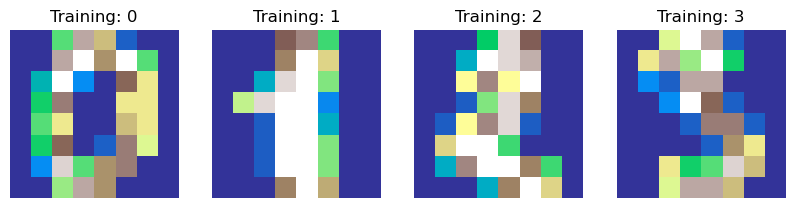

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
#                            axes, independent,  dependent variable
for ax, image, label in zip(axes, digits.images, digits.target):

  ax.set_axis_off()
  # ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  # ax.imshow(image, cmap=plt.cm.Set1_r, interpolation='nearest')
  ax.imshow(image, cmap=plt.cm.terrain, interpolation='nearest')
  ax.set_title('Training: %i' % label)

# 5. Data Classification
To apply a classifier on this data, we need to
* **flatten the images**,
* turning each 2-D array of grayscale values from **shape (8, 8)** into **shape (64,).**

Subsequently, the entire dataset will be of **shape (n_samples, n_features),** where
* **n_samples** is the *number of images.* **(1797)**
* **n_features** is the *total number of pixels in each image.* **(64)**

#### Flatten N-d array to 1-D array using **"reshape()"** and passing **"-1"** as an argument.

In [6]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Get the number of features in each image
# print(len(digits.images[0]))

# Get the total number of features from the shape of the images
feature = (digits.images.shape[1] * (len(digits.images[0])))
print("Total number of features ".ljust(50, '.'), ": ",feature)

print("Number of images and shape of each ".ljust(50, '.'), ": ",digits.images.shape)
# print(n_samples)
# print(data.shape)

print("Shape of digit dataset matrix (rows, columns)".ljust(50, '.'), ": ",digits.data.shape)
# print(digits.target.shape)
# print(data[0])
# print(digits.target[0])

Total number of features ......................... :  64
Number of images and shape of each ............... :  (1797, 8, 8)
Shape of digit dataset matrix (rows, columns)..... :  (1797, 64)


#### [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)
**Support vector machines (SVMs)** are a set of **supervised learning** methods used for **classification,** <br>**regression** and **outliers** detection.

*Advantages and disadvantages are described nicely please check the above link.*

#### [RBF SVM parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)
Understand the effect of the parameters **gamma and C** of the **Radial Basis Function (RBF)** kernel **SVM**.

**With Low Gamma:**
* The decision boundary will be smooth and broad.
* The model may underfit by not capturing enough detail.

In [7]:
# Create a classifier: a support vector classifier
svm_clf = svm.SVC(gamma=0.001, kernel='rbf')




# 6. Dataset distribution and training
## 6.1 Distributing the dataset into 'training and test (validation)' set

We can then split the data into **train and test** subsets and **fit a support vector classifier** on the *train samples.*
<br>The **fitted classifier** can subsequently be used to <u>*predict the value of the digit for the samples in the **"test subset"**.*</u>

In [8]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

## 6.2 Dataset classification using SVM classifier

In [9]:
# Learn the digits on the train subset
svm_clf.fit(X_train, y_train)

SVC(gamma=0.001)

# 7. Dataset Validation and Visualization
## 7.1 Dataset Prediction and Validation

In [10]:
# Predict the value of the digit on the test subset
predicted = svm_clf.predict(X_test)
predicted

array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 5, 4, 6, 3, 1,
       7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,

## 7.1 Dataset Vsiualization
#### Let's visualize the first 4 test samples and show their predicted digit value in the title.

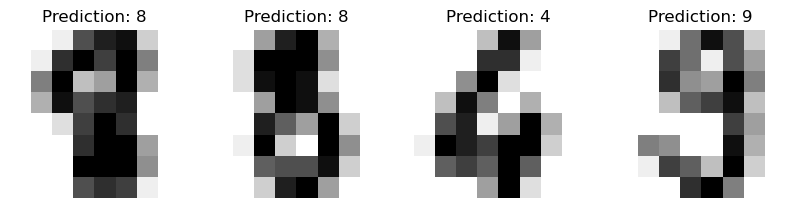

In [11]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
#                               axes, independent,  dependent
for ax, image, prediction in zip(axes, X_test, predicted):
  ax.set_axis_off()
  # ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
  # ax.set_title('Prediction: %i' % prediction)
  ax.set_title(f'Prediction: {prediction}')

# 8. Classification Report and Accuracy Result

#### [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#classification-report)
Build a text report showing the main classification metrics.

* **y_true : 1d array-like, or label indicator array / sparse matrix**
<br>Ground truth (correct) target values.

* **y_pred : 1d array-like, or label indicator array / sparse matrix**
<br>Estimated targets as returned by a classifier.

In [12]:
print(f"Classification report for classifier {svm_clf}:\n")
#                                   y_true, y_predicted
print(metrics.classification_report(y_test, predicted))
print('-'*100,"\n")
print(f"Accuracy Score for classifier {svm_clf}:")
#                                                y_true, y_predicted
print(f"{'accuracy':^12}: {metrics.accuracy_score(y_test, predicted):.4f}")

Classification report for classifier SVC(gamma=0.001):

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

---------------------------------------------------------------------------------------------------- 

Accuracy Score for classifier SVC(gamma=0.001):
  accuracy  : 0.9689


# 9. Data Evaluation
The **confusion_matrix** function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the **true class** versus **predicted.**

#### [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
Confusion Matrix visualization, display labels for plot.
#### [ConfusionMatrixDisplay.from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator)
Plot Confusion Matrix given an estimator and some data.

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


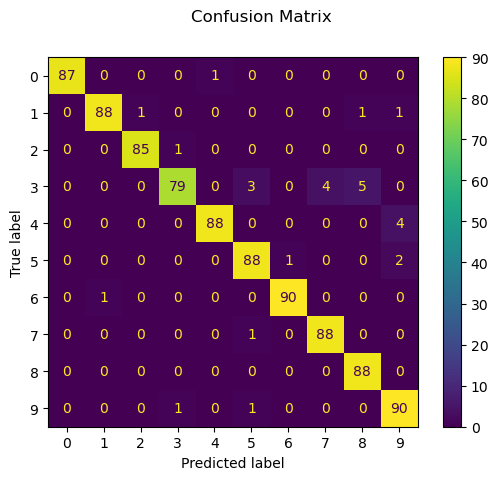

In [13]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    svm_clf,
    X_test,
    y_test,
    display_labels=svm_clf.classes_,)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

#### [ConfusionMatrixDisplay.from_predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions)
Plot Confusion Matrix given true and predicted labels.

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


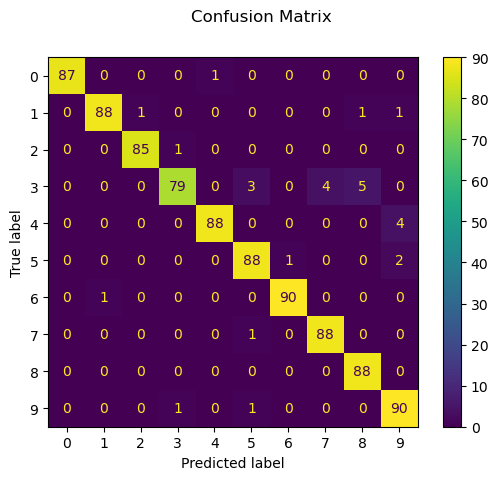

In [14]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=predicted,
)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()